## **IMPORTING LIBRARIES**



In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

## **READING CSV FILE**



In [5]:
df = pd.read_csv("./Housing.csv")

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.shape

(545, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [16]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [35]:
columns_to_drop = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

In [36]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking,SalePrice
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
 6   SalePrice  545 non-null    int64
dtypes: int64(7)
memory usage: 29.9 KB


**Checking for null values**


In [38]:
df.isnull().sum()


price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
SalePrice    0
dtype: int64

## **General corellation analysis**



<AxesSubplot: >

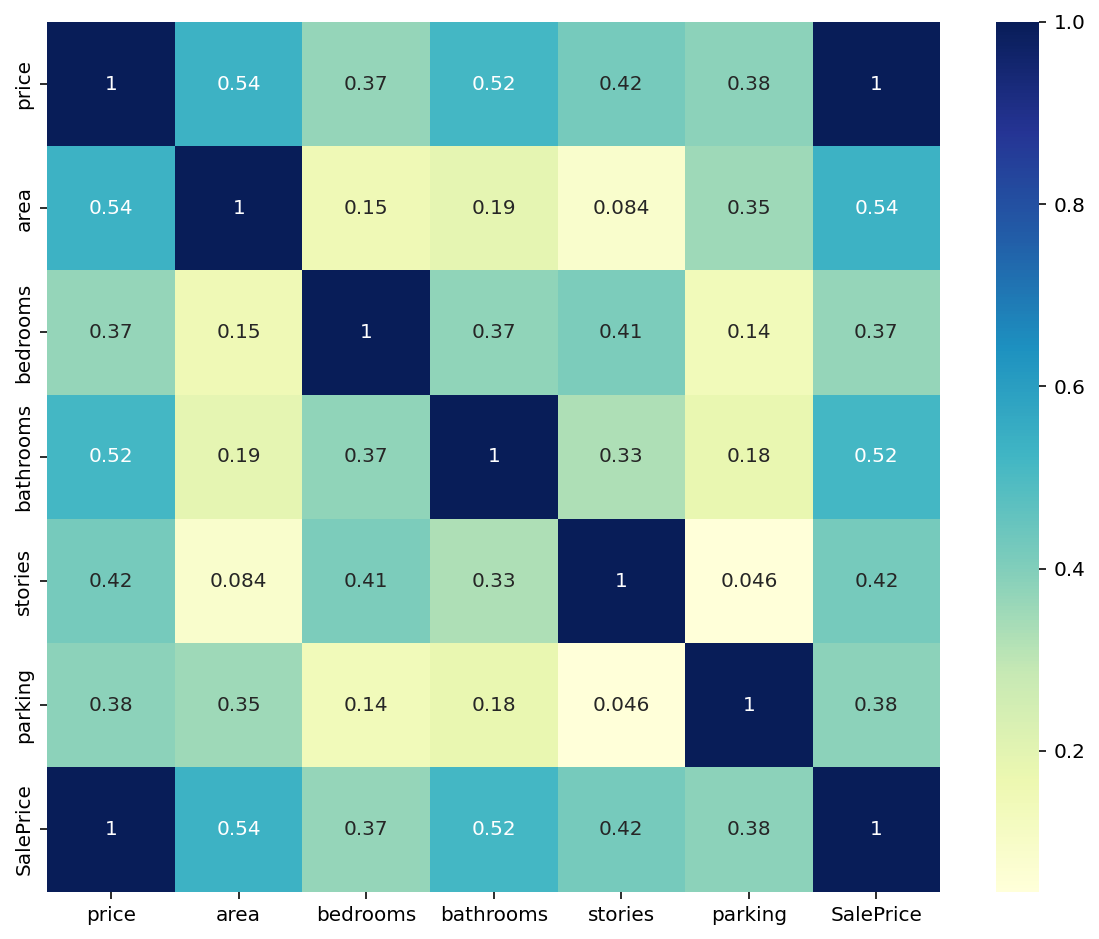

In [40]:
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
cor = df.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")


#### **Analysis on number of bedroom feature**



<AxesSubplot: xlabel='bedrooms', ylabel='price'>

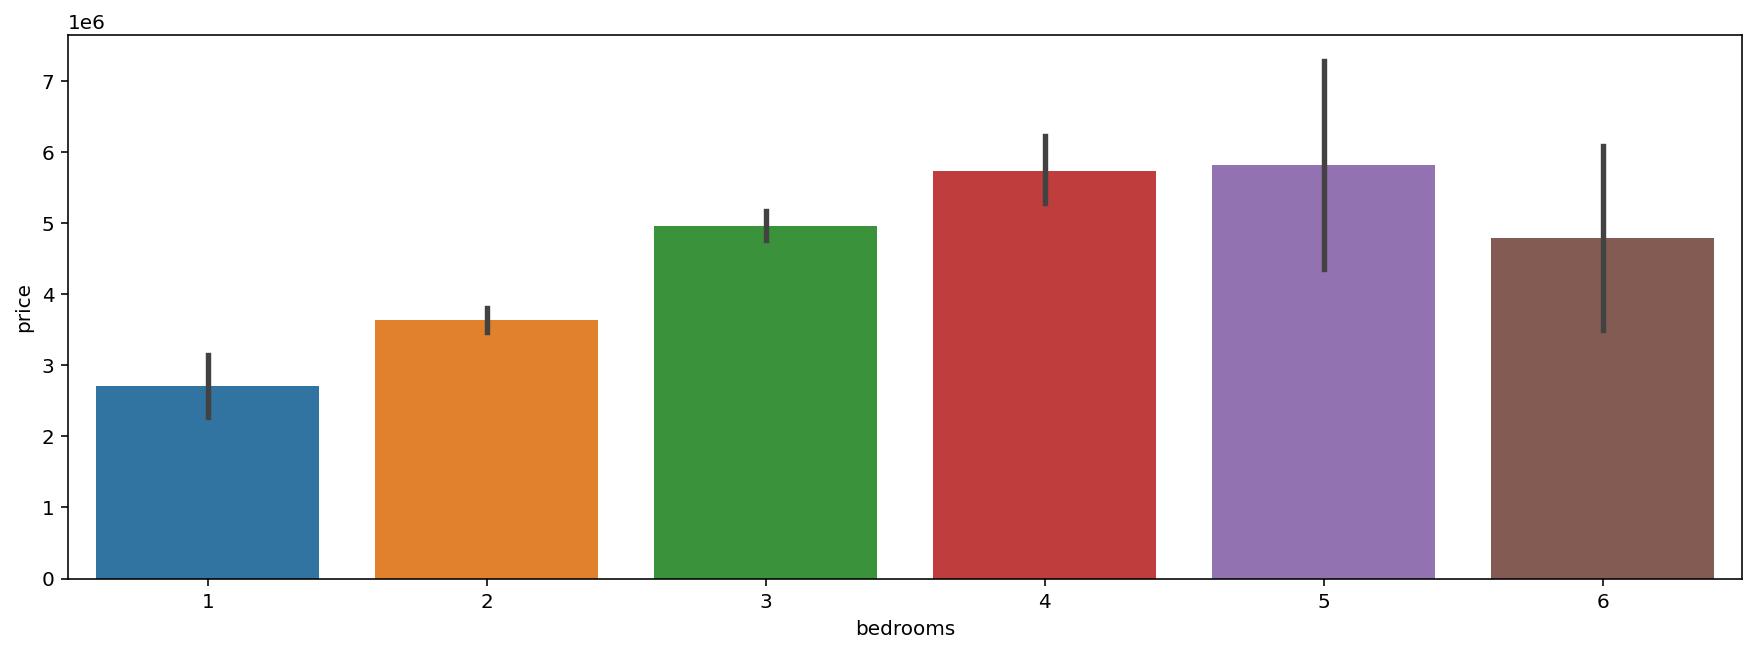

In [41]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = df.bedrooms, y = df.price)

In [42]:
df.groupby('bedrooms').price.agg([len, min, max])

,len,min,max
bedrooms,,,
1,2,2275000,3150000
2,136,1750000,7070000
3,300,1750000,12250000
4,95,2100000,13300000
5,10,1960000,10150000
6,2,3500000,6083000


In [44]:
df1 = df[(df.bedrooms > 0) & (df.bedrooms < 9)].copy()
df1.shape


(545, 7)

### **Analysis on number of bedroom feature**



<AxesSubplot: xlabel='price', ylabel='bathrooms'>

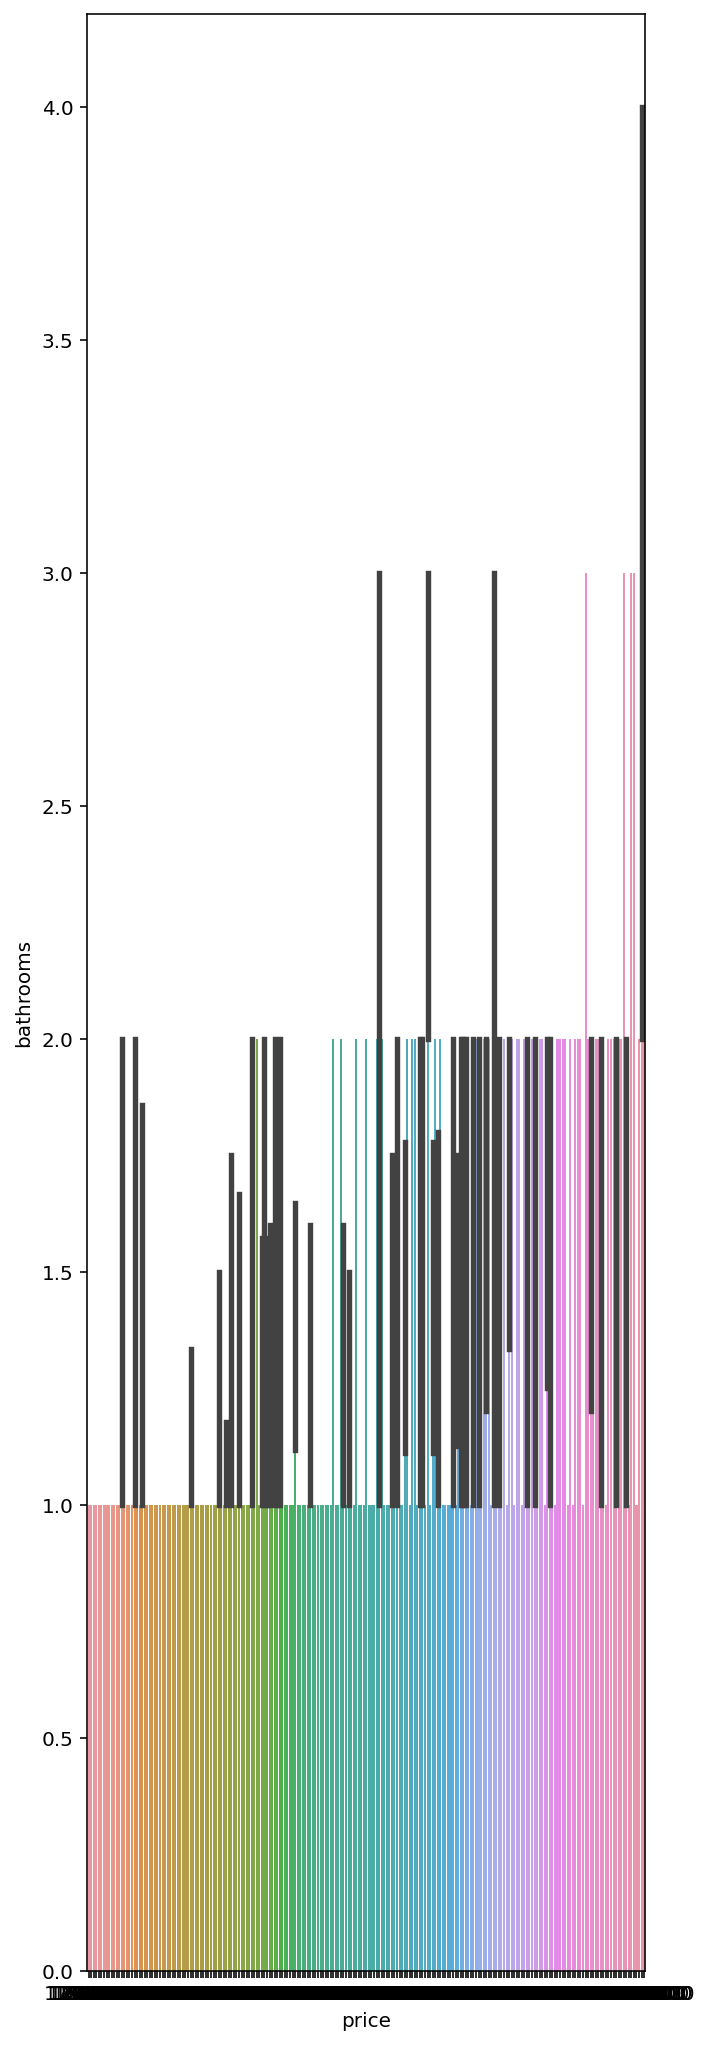

In [46]:
a4_dims = (5, 18)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax = ax, x = df.price, y = df.bathrooms)

<AxesSubplot: xlabel='price', ylabel='Density'>

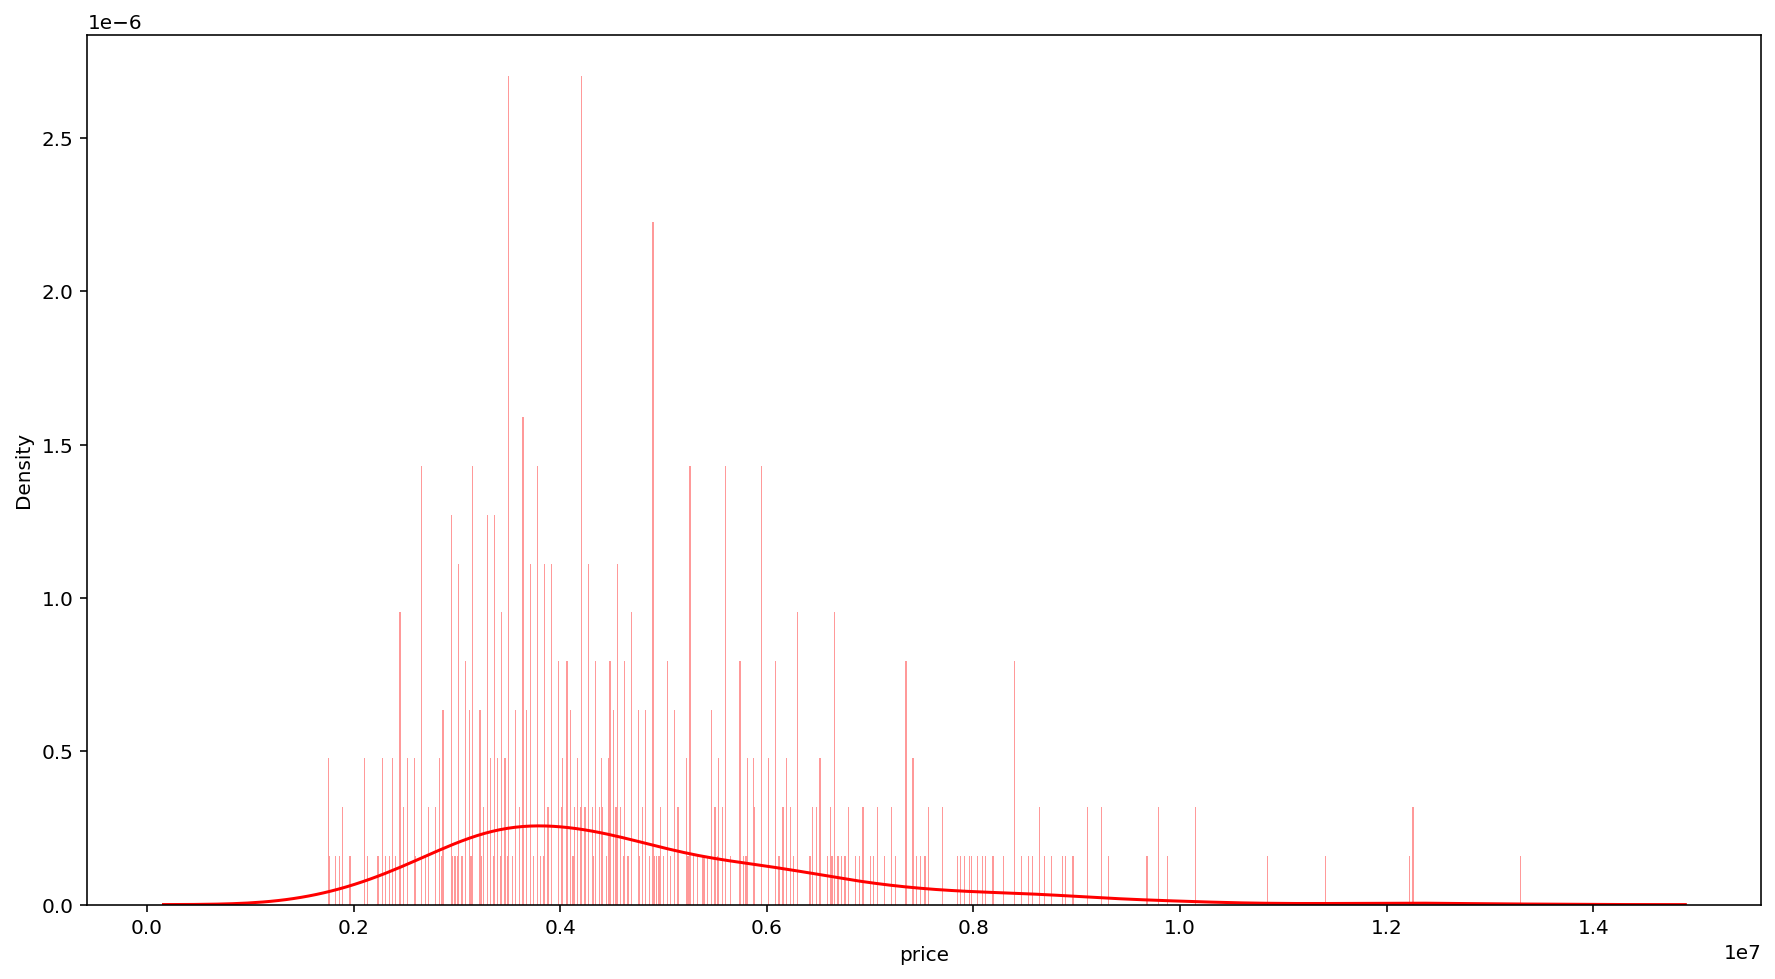

In [47]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(a = df.price, bins = 1000, color = 'r', ax = ax)


In [48]:
df.price.agg([min, max])

min     1750000
max    13300000
Name: price, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
 6   SalePrice  545 non-null    int64
dtypes: int64(7)
memory usage: 29.9 KB


<AxesSubplot: xlabel='bathrooms', ylabel='price'>

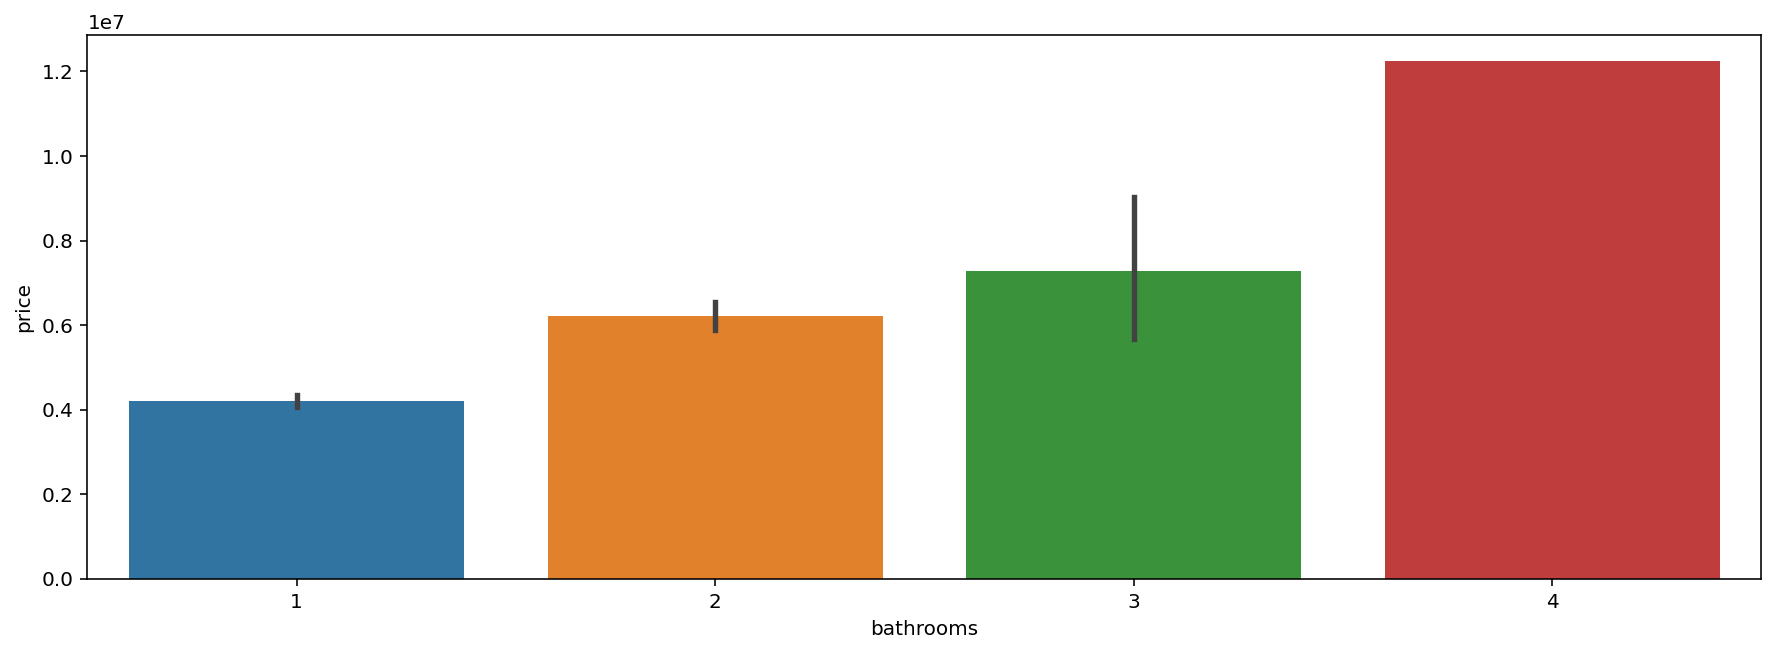

In [50]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = df.bathrooms, y = df.price)

### **Analysis on all the instances whose price is 0**



In [51]:
zero_price = df[(df.price == 0)].copy()
zero_price.shape

(0, 7)

In [53]:
zero_price.head()

,price,area,bedrooms,bathrooms,stories,parking,SalePrice


In [56]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,SalePrice
0,13300000,7420,4,2,3,2,13300000
1,12250000,8960,4,4,4,3,12250000
2,12250000,9960,3,2,2,2,12250000
3,12215000,7500,4,2,2,3,12215000
4,11410000,7420,4,1,2,2,11410000


### **Splitting into train and test set**



In [57]:
X = df.iloc[:, 1:]
X.shape

(545, 6)

In [58]:
y = df.price

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.1, random_state=42)
print(len(X_train) / len(df))

0.8990825688073395


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.1, random_state=42)
print(len(X_train) / len(df))

0.8990825688073395


In [61]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)
print(len(X_test) / len(y_rem))

0.509090909090909


In [62]:
print(len(X_train))
print(len(X_val))
print(len(X_val))

490
27
27


### **Linear regression**



In [63]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [64]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [65]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
rmse

2.537905438995759e-09

In [66]:
y_val.head(10)

431     3290000
2      12250000
497     2660000
316     4060000
473     3003000
210     4900000
512     2520000
158     5495000
77      6650000
163     5425000
Name: price, dtype: int64

In [67]:
y_pred

array([ 3290000.        , 12250000.00000001,  2660000.        ,
        4060000.        ,  3003000.        ,  4900000.        ,
        2520000.        ,  5495000.        ,  6650000.        ,
        5425000.        ,  3710000.        ,  8400000.        ,
        2380000.        ,  4200000.        ,  5250000.        ,
        3150000.        , 10150000.        ,  1890000.        ,
        2940000.        ,  3234000.        ,  6720000.        ,
        4543000.        ,  6650000.        ,  2275000.        ,
        9800000.        ,  2450000.        ,  3500000.        ])

In [68]:
y_pred_test = lin_reg.predict(X_test)
mse = mean_squared_error(y_pred_test, y_test)
rmse = np.sqrt(mse)
rmse

1.797584403878829e-09

In [69]:
lin_reg.score(X_test, y_test)

1.0

In [70]:
y_test

398    3500000
209    4900000
79     6650000
424    3360000
486    2870000
540    1820000
367    3675000
463    3080000
199    4907000
422    3360000
284    4270000
90     6440000
483    2940000
429    3325000
516    2450000
55     7350000
176    5250000
493    2800000
137    5740000
184    5110000
83     6580000
255    4480000
324    4007500
499    2660000
426    3353000
498    2660000
304    4193000
70     6790000
Name: price, dtype: int64

In [71]:
y_pred_test

array([3500000., 4900000., 6650000., 3360000., 2870000., 1820000.,
       3675000., 3080000., 4907000., 3360000., 4270000., 6440000.,
       2940000., 3325000., 2450000., 7350000., 5250000., 2800000.,
       5740000., 5110000., 6580000., 4480000., 4007500., 2660000.,
       3353000., 2660000., 4193000., 6790000.])

## **Decision tree regression**



In [72]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state = 42, max_depth = 10)

In [73]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [74]:
reg.score(X_test, y_test)

0.9998553122209912

In [75]:
y_val.head(10)

431     3290000
2      12250000
497     2660000
316     4060000
473     3003000
210     4900000
512     2520000
158     5495000
77      6650000
163     5425000
Name: price, dtype: int64